<a href="https://colab.research.google.com/github/akshaya-nagarajan/MachineLearning/blob/master/PageRankInPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install git+https://github.com/mitsuhiko/flask-oauth

  Cloning https://github.com/mitsuhiko/flask-oauth to /tmp/pip-req-build-tq1x50w1
  Running command git clone -q https://github.com/mitsuhiko/flask-oauth /tmp/pip-req-build-tq1x50w1
  Running command git submodule update --init --recursive -q
  Created wheel for Flask-OAuth: filename=Flask_OAuth-0.13-cp36-none-any.whl size=7300 sha256=2e7faedf65f71fd70a43c041b44ed02256eeec1b68c6ba7521dea3e3f3bff084
  Stored in directory: /tmp/pip-ephem-wheel-cache-oxn5d2s0/wheels/c4/bc/23/62f2b06186a0307601258efa25becf1cb4b114a73c17eafecc
Successfully built Flask-OAuth


In [0]:
import subprocess
from urllib.parse import urlparse
try:
    import urllib.request as urllib2
except ImportError:
    import urllib2
from urllib.parse import urlencode
import socket
from multiprocessing import Queue
import threading
import getopt
import sys
import os
import networkx as nx
from bs4 import BeautifulSoup
import matplotlib

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (7, 5), 'figure.dpi': 80})
import threading, queue
import re
import pandas as pd

In [0]:
q = queue.Queue()
max_threads=50
next_url=queue.Queue()
crawled_urls=[]

def check_link(url):
    domain = '.'.join(urlparse(url).netloc.split('.')[-2:])
    filetype = urlparse(url).path.split('/')[-1:][0].split('.')[-1:][0]
    if  (domain == 'politifact.com' and filetype != 'pdf'):
      return True
    else:
      return False

def get_host(url):
  try:
    return socket.gethostbyname(urlparse(url).netloc)
  except:
      pass
  return None

def get_links_from_page(url):
    urllist = []
    try:
      res=urllib2.urlopen(url)
      htmlpage=res.read()
    except:
      return urllist

    try:
      page=BeautifulSoup(htmlpage)
    except:
      return urllist

    #refs=page.findAll("a")
    pattern = re.compile(r"https://www.*.com/*")
    refs = page.findAll("a", href=pattern)[25:35]
    for a in refs:
      try:
        link = a['href']
        if link[:4] == 'http':
          urllist.append(link)
      except:
        pass

    return urllist

def find_links(url_tuple,graph):
    '''Crawls to a given depth using a tuple structure to tag urls with their depth'''
    global crawled_urls, next_url, max_depth
    url = url_tuple[0]
    depth = url_tuple[1]
    if (depth < 2) :
      links = get_links_from_page(url)
      for link in links:
        '''These two lines create the graph'''
        graph.add_node(link)
        graph.add_edge(url,link)
        '''If the link has not been crawled yet, add it in the queue with additional depth'''
        if link not in crawled_urls:
          next_url.put((link, depth+1))
          crawled_urls.append(link)
    return 

class crawler_thread(threading.Thread):
    def __init__(self,queue,graph):
      threading.Thread.__init__(self)
      self.to_be_crawled=queue
      self.graph=graph
      while self.to_be_crawled.empty() is False:
        find_links(self.to_be_crawled.get(), self.graph)

def draw_graph(graph, graph_file_name):
	'''Function to draw the graph and save the files'''
	nx.draw(graph,with_labels=False)
	nx.write_dot(graph,os.cwd()+graph_file_name+'.dot')
	plt.savefig(os.cwd()+graph_file_name+'.png')

In [0]:
def calculatePageRank(url):
  print(str(url))
  root_url = url
  parser_flag = 'beautifulsoup'
  max_depth=2

  next_url.put((root_url,0))
  crawled_urls.append(root_url)
  ip_list=[]
  g=nx.Graph()
  g.add_node(root_url)
  thread_list=[]

  for i in range(max_threads): #changed
    t=crawler_thread(next_url,g)
    t.daemon=True
    t.start()
    thread_list.append(t)

  for t in thread_list:
    t.join()

  # for url in crawled_urls:
  #   ip_list.append(socket.gethostbyname(urlparse(url).netloc))
  #   ip_set=set(ip_list)
  #   ip_list = [*ip_set, ]

  # print("Unique Host: %s " % len(ip_list))
  pagerank = nx.pagerank_numpy(g, alpha=0.85, personalization=None,  weight='weight', dangling=None)
  edgeNumber = g.number_of_edges()
  nodeNumber = g.number_of_nodes()
  nodesize=[g.degree(n)*10 for n in g]
  pos=nx.spring_layout(g,iterations=20)

  nx.draw(g,with_labels=False)
  nx.draw_networkx_nodes(g,pos,node_size=nodesize,node_color='r')
  nx.draw_networkx_edges(g,pos)
  plt.figure(figsize=(5,5))
  plt.show()
  # return np.array(len(ip_list), pagerank.get(url), edgeNumber, nodeNumber)
  return pd.Series([pagerank.get(url), edgeNumber, nodeNumber], index=['pagerank','edges', 'nodes'])

https://www.theatlantic.com/politics/archive/2019/06/2020-democrats-abortion/590701/


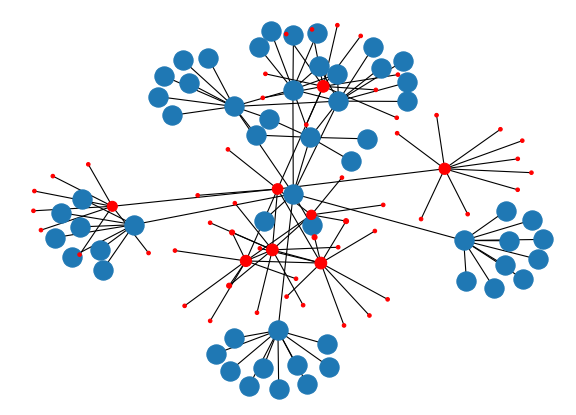

<Figure size 400x400 with 0 Axes>

pagerank     0.059021
edges       65.000000
nodes       57.000000
dtype: float64

In [5]:
url = 'https://www.theatlantic.com/politics/archive/2019/06/2020-democrats-abortion/590701/'
calculatePageRank(url)

https://www.theatlantic.com/health/archive/2020/06/covid-19-coronavirus-longterm-symptoms-months/612679/


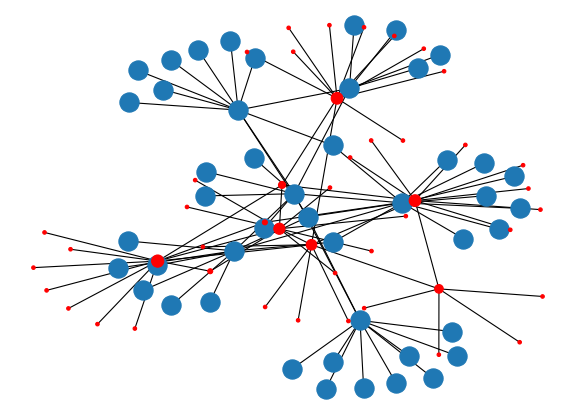

<Figure size 400x400 with 0 Axes>

pagerank     0.077637
edges       52.000000
nodes       46.000000
dtype: float64

In [6]:
url = 'https://www.theatlantic.com/health/archive/2020/06/covid-19-coronavirus-longterm-symptoms-months/612679/'
calculatePageRank(url)

https://www.theatlantic.com/politics/archive/2013/10/coal-countrys-decline-has-a-long-history/453144/


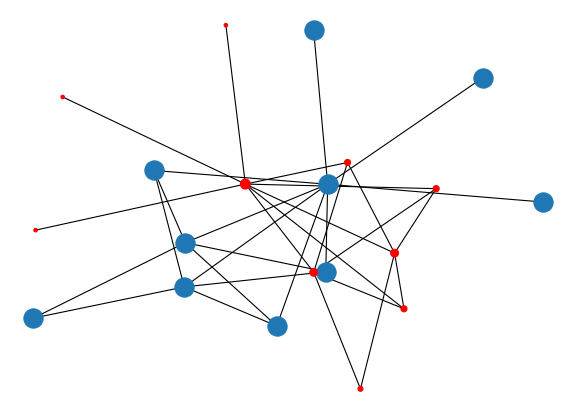

<Figure size 400x400 with 0 Axes>

pagerank     0.247062
edges       16.000000
nodes       10.000000
dtype: float64

In [7]:
url = 'https://www.theatlantic.com/politics/archive/2013/10/coal-countrys-decline-has-a-long-history/453144/'
calculatePageRank(url)

https://www.theatlantic.com/politics/archive/2020/06/mitt-romney-black-lives-matter/612808/


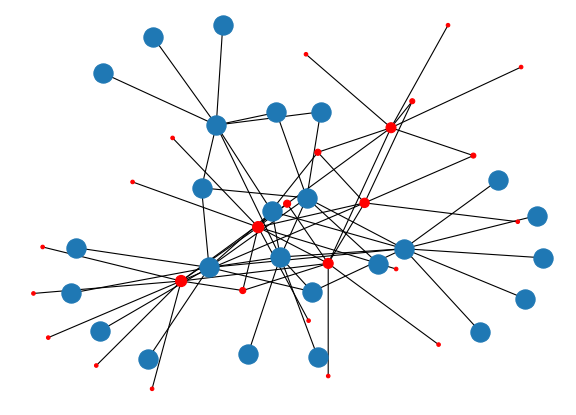

<Figure size 400x400 with 0 Axes>

pagerank     0.100542
edges       36.000000
nodes       25.000000
dtype: float64

In [8]:
url = 'https://www.theatlantic.com/politics/archive/2020/06/mitt-romney-black-lives-matter/612808/'
calculatePageRank(url)

https://www.theatlantic.com/technology/archive/2013/08/what-is-medium/278965/


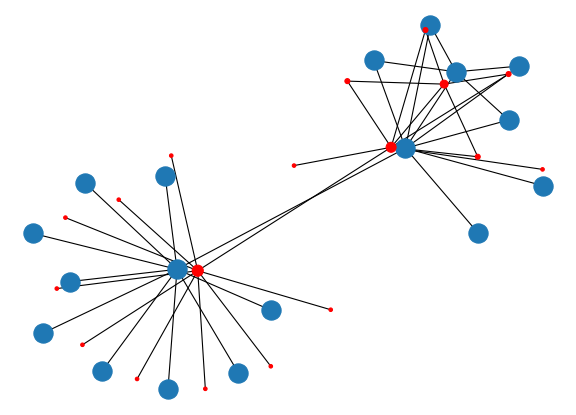

<Figure size 400x400 with 0 Axes>

pagerank     0.16064
edges       21.00000
nodes       18.00000
dtype: float64

In [9]:
url = 'https://www.theatlantic.com/technology/archive/2013/08/what-is-medium/278965/'
calculatePageRank(url)